In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from binarypredictor.dataset import FunctionDataset
from binarypredictor.net import DerivativeNet

In [2]:
fd = FunctionDataset(100000, 'vals.csv')

In [11]:
loader = DataLoader(fd, batch_size=256, shuffle=True)
net = DerivativeNet(train=True, hidden_layers=3)

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

for i in range(100):
    for d in loader:
        inp, targets = d[:, :, 0], d[:, :, 1]
        targets[targets > 1000] = 0
        out = net(inp.float())

        optimizer.zero_grad()
        loss = loss_fn(out, targets)
        loss.backward()
        optimizer.step()
        
    print(loss)

In [13]:
#torch.save(net, 'DerivativeNet_100.pth')

In [2]:
x = torch.arange(0., 1., step=0.01)

d = fd[3]
inp = d[:, 0]
out = net(inp)

plt.scatter(x, inp, s=0.2)
plt.show()
plt.ylim(-5, 5)
plt.scatter(x, out.detach(), s=0.2)
plt.scatter(x, d[:, 1].detach(), s=0.2)
print(torch.diff(torch.sign(out)))

NameError: name 'fd' is not defined

In [15]:
idx = torch.where(torch.diff(torch.sign(out)) != 0)[0]
print(x[idx[idx != 0]])

tensor([0.5000])


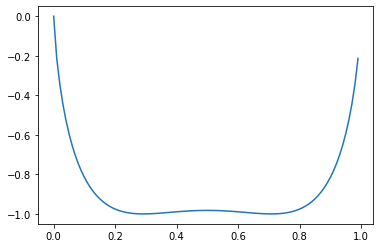

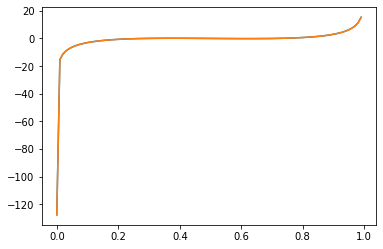

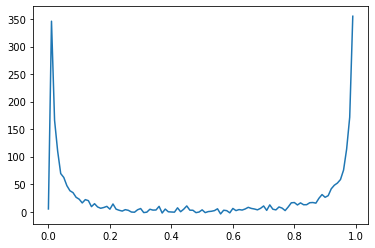

tensor([0.2600, 0.2800, 0.3000, 0.3200, 0.3600, 0.3700, 0.3800, 0.4100, 0.4200,
        0.4300, 0.4700, 0.4900, 0.5000, 0.5100, 0.5500, 0.5600, 0.5800, 0.5900])


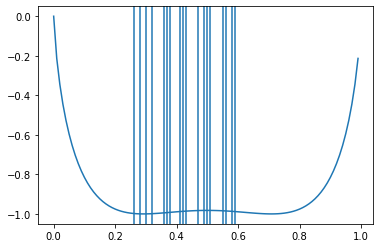

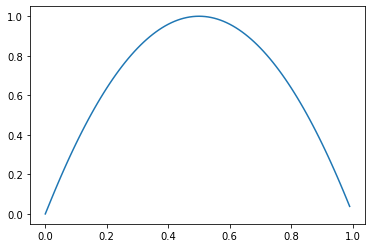

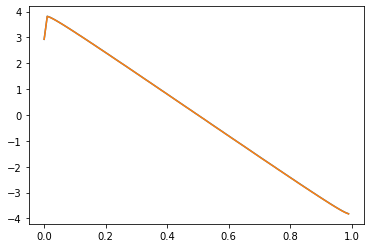

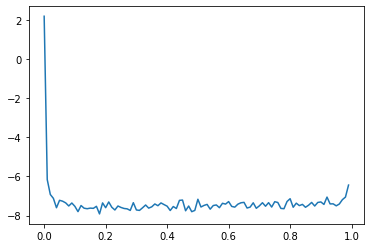

tensor([])


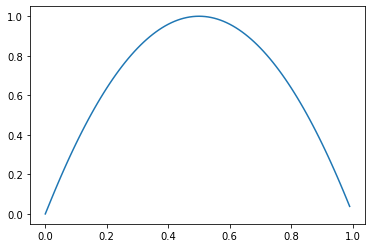

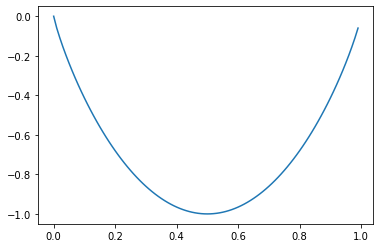

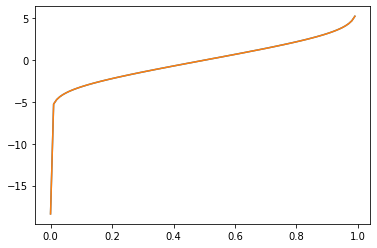

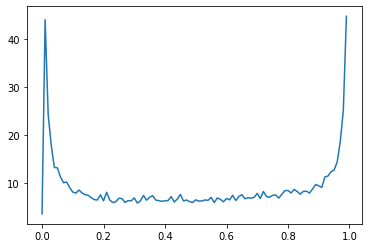

tensor([])


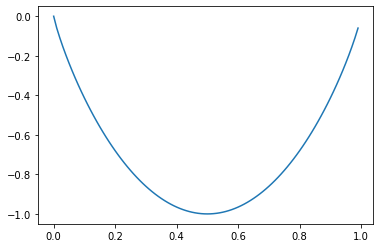

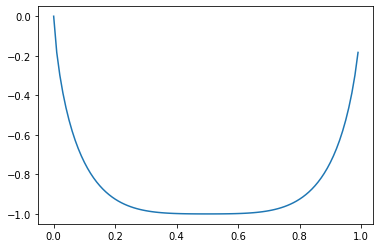

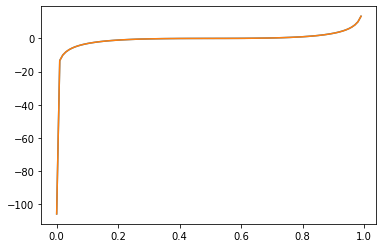

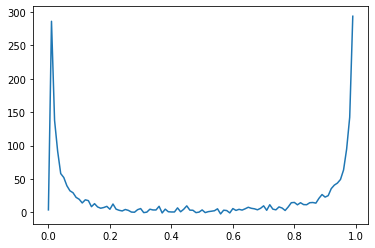

tensor([0.3000, 0.3100, 0.3600, 0.3700, 0.4700, 0.4800, 0.5000, 0.5100, 0.5500,
        0.5600, 0.5800, 0.5900])


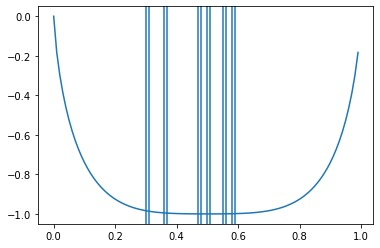

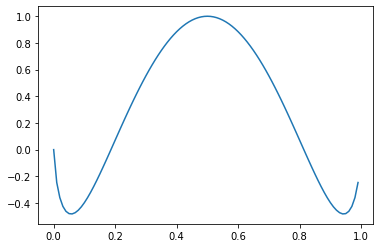

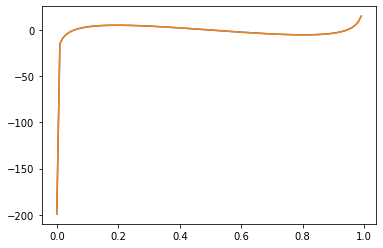

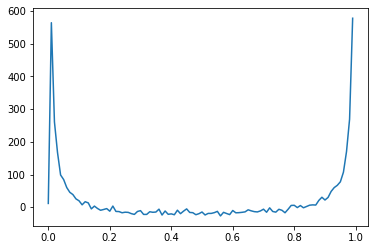

tensor([0.1300, 0.1400, 0.1500, 0.2000, 0.2100, 0.7800, 0.8000, 0.8100, 0.8200,
        0.8300])


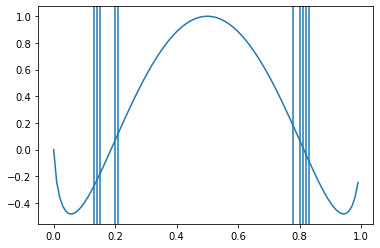

In [5]:
net = torch.load('DerivativeNet_100.pth')
fd_test = FunctionDataset(5, 'None.csv', o=0)

for d in fd_test:
    plt.plot(x, d[:, 0])
    plt.show()
    plt.plot(x, d[:, 1])
    
    out = net(d[:, 0])
    plt.plot(x, out.detach())
    plt.show()
    
    second_der = net(out)
    plt.plot(x, second_der.detach())
    plt.show()
    
    idx = torch.where(torch.diff(torch.sign(second_der)) != 0)[0]
    idx = x[idx[idx != 0]]
    print(idx)
    
    plt.plot(x, d[:, 0])
    for i in idx:
        plt.axvline(i)
    plt.show()